# Medicine/Healthcare: AI Diagnostic Assistant for Rare Diseases 

## Develop a machine learning-powered diagnostic assistant to support early identification of genetic rare diseases by analyzing structured symptom reports and basic lab test data, aiming to assist general practitioners in making referral decisions.

### 1. What rare diseases will the project focus on?
The project will target rare inherited blood and metabolic disorders that are underdiagnosed in the Caribbean, Latin America, and among diaspora populations in the United States. Specifically, it will focus on:

Sickle Cell Disease (SCD) – highly prevalent in Afro-Caribbean populations in Jamaica, Haiti, the Dominican Republic, and in diaspora communities in Florida, New York, and Georgia. SCD is well-studied in the U.S., providing a robust data foundation for modeling.

Beta-Thalassemia – present in the Caribbean due to mixed African, Indian, and Chinese heritage, particularly in Trinidad & Tobago, Guyana, Suriname, and parts of South Florida and New York, where diaspora populations reside.

Gaucher Disease Type 1 – rare but documented in Brazil, Colombia, and Argentina, as well as in Latino populations in the U.S., particularly in states with large Central and South American communities.

Maple Syrup Urine Disease (MSUD) – increasingly covered by newborn screening in Brazil, Mexico, and most U.S. states, but often missed in underserved rural and immigrant populations.

These conditions are chosen for their clinical relevance, diagnostic complexity, and the availability of both regional and U.S.-based datasets for training and validation.

### 2. Who is the diagnostic assistant designed for?
The assistant is designed for general practitioners, pediatricians, and frontline healthcare providers in Latin America, the Caribbean, and immigrant-heavy areas in the United States. These professionals often face diagnostic uncertainty due to limited access to specialized care or genomic testing. The tool will assist in early identification and triage, helping reduce the diagnostic delays that are common in these conditions.

### 3. What data will the assistant use?
The assistant will use structured tabular data typically available in primary care and pediatric settings, including:

### Symptoms:
Chronic fatigue Growth delays Bone or joint pain Recurrent infections Jaundice Abdominal swelling (e.g., liver/spleen enlargement)

### Basic lab results:
Hemoglobin, hematocrit, MCV (for anemia classification) Reticulocyte count Total and direct bilirubin (for hemolysis and liver function) Creatine kinase (muscle involvement) ALT, AST (liver health indicators)

### Demographics and risk factors:
Age and sex Ethnicity (Afro-Caribbean, Latino, Indigenous, South Asian-Caribbean) Family history of inherited disorders Country or region of residence (Jamaica, Trinidad, Brazil, U.S. states with high diaspora populations)

### Data will be sourced from:
U.S. public health databases (e.g., CDC Sickle Cell Data Collection Program, NHANES, SEER) Latin American & Caribbean health records (e.g., Brazil’s DATASUS, PAHO reports) Synthetic datasets modeled after underserved populations when real data is limited or unavailable

The model will be built using machine learning algorithms such as Random Forests, Gradient Boosting (XGBoost), and potentially interpretable models like Logistic Regression, depending on performance and explainability needs.

In [1]:
import os
import pandas as pd
import zipfile
import kagglehub

# Download dataset
dataset_path = kagglehub.dataset_download("florencetushabe/sickle-cell-disease-dataset")
print("Dataset downloaded to:", dataset_path)

# List files/folders in dataset_path
print("Files/folders in dataset directory:")
print(os.listdir(dataset_path))

# If files are zipped, unzip them
for file in os.listdir(dataset_path):
    if file.endswith('.zip'):
        zip_path = os.path.join(dataset_path, file)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_path)
        print(f"Extracted {file}")

# Now recursively search for CSV files after extraction
csv_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print(f"CSV files found: {csv_files}")

if csv_files:
    # Load first CSV file to inspect
    df = pd.read_csv(csv_files[0])
    print(df.head())
else:
    print("No CSV files found in the dataset folder.")


Dataset downloaded to: /kaggle/input/sickle-cell-disease-dataset
Files/folders in dataset directory:
['Negative', 'Positive']
CSV files found: []
No CSV files found in the dataset folder.


In [2]:
import os

base_path = '/kaggle/input/sickle-cell-disease-dataset'

# List contents of Positive and Negative folders
for folder in ['Negative', 'Positive']:
    folder_path = os.path.join(base_path, folder)
    print(f"Files in {folder} folder:")
    print(os.listdir(folder_path))

Files in Negative folder:
['Clear']
Files in Positive folder:
['Unlabelled', 'Labelled']


In [6]:
import os

base_path = '/kaggle/input/sickle-cell-disease-dataset'

subfolders = {
    'Negative': ['Clear'],
    'Positive': ['Unlabelled', 'Labelled']
}

for main_folder, subs in subfolders.items():
    for sub in subs:
        path = os.path.join(base_path, main_folder, sub)
        print(f"Files in {main_folder}/{sub}:")
        files = os.listdir(path)
        print(files[:10])  # print first 10 files only for brevity
        print(f"Total files: {len(files)}\n")


Files in Negative/Clear:
['45.jpg', '56.jpg', '89.jpg', '20.jpg', '58.jpg', '6.jpg', '109.jpg', '76.jpg', '71.jpg', '143.jpg']
Total files: 147

Files in Positive/Unlabelled:
['208.jpg', '333.jpg', '45.jpg', '369.jpg', '56.jpg', '89.jpg', '20.jpg', '275.jpg', '212.jpg', '239.jpg']
Total files: 422

Files in Positive/Labelled:
['208.jpg', '333.jpg', '45.jpg', '369.jpg', '56.jpg', '89.jpg', '20.jpg', '275.jpg', '212.jpg', '239.jpg']
Total files: 422



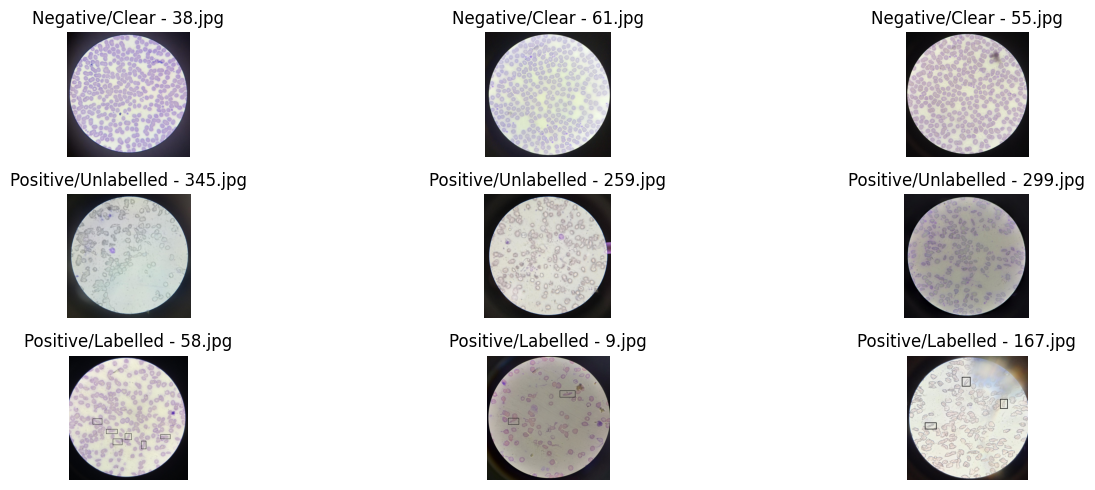

In [4]:
import matplotlib.pyplot as plt
import cv2  # OpenCV to read images
import random
import os

# Define base dataset path
base_path = '/kaggle/input/sickle-cell-disease-dataset'

# Folders to sample from
folders = [
    'Negative/Clear',
    'Positive/Unlabelled',
    'Positive/Labelled'
]

# Function to display random samples from each folder
def show_samples():
    plt.figure(figsize=(15, 5))
    
    for i, folder in enumerate(folders):
        folder_path = os.path.join(base_path, folder)
        images = os.listdir(folder_path)
        sample_images = random.sample(images, 3)  # show 3 random images per folder
        
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
            
            plt.subplot(len(folders), 3, i*3 + j + 1)
            plt.imshow(img)
            plt.title(f"{folder} - {img_name}")
            plt.axis('off')
            
    plt.tight_layout()
    plt.show()

show_samples()


Folder: Negative/Clear, Number of files: 147
Folder: Positive/Unlabelled, Number of files: 422
Folder: Positive/Labelled, Number of files: 422

Summary of dataset images:
folder
Negative/Clear         147
Positive/Labelled      422
Positive/Unlabelled    422
dtype: int64

Image dimension stats per folder:
                           width                   height           
                            mean   min   max         mean  min   max
folder                                                              
Negative/Clear       1000.000000  1000  1000  1015.217687  901  1116
Positive/Labelled     997.052133   469  1000  1003.684834  436  1333
Positive/Unlabelled  1646.218009   469  3456  1664.954976  436  4160


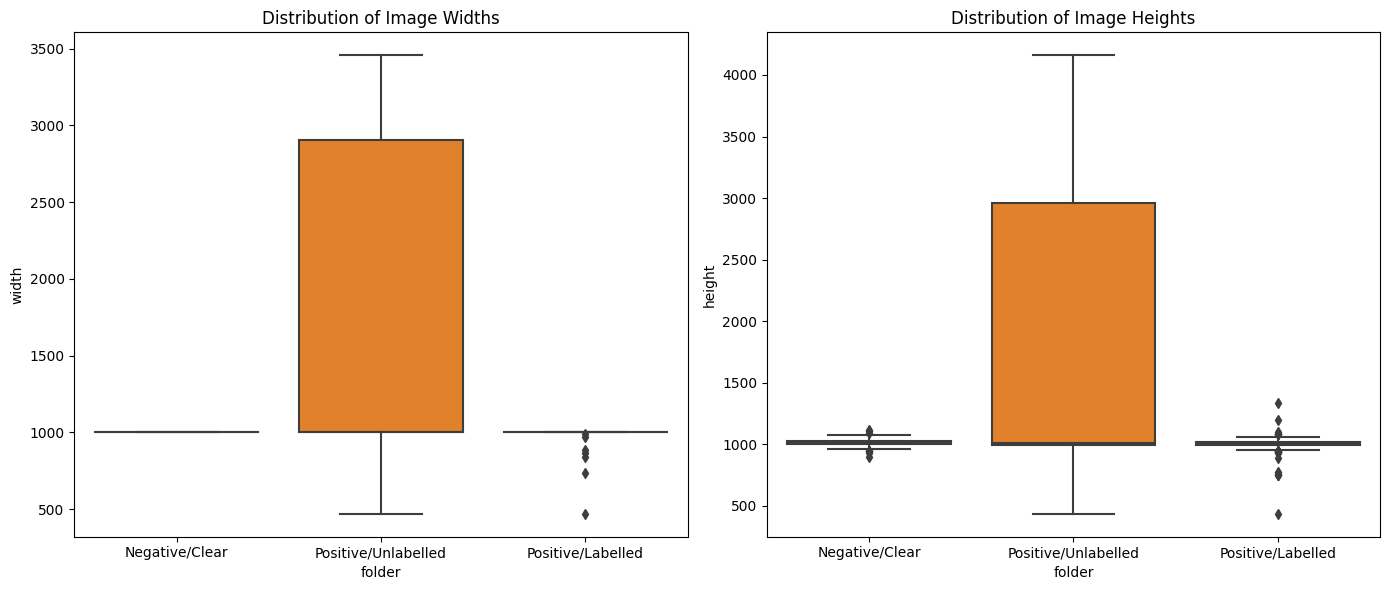

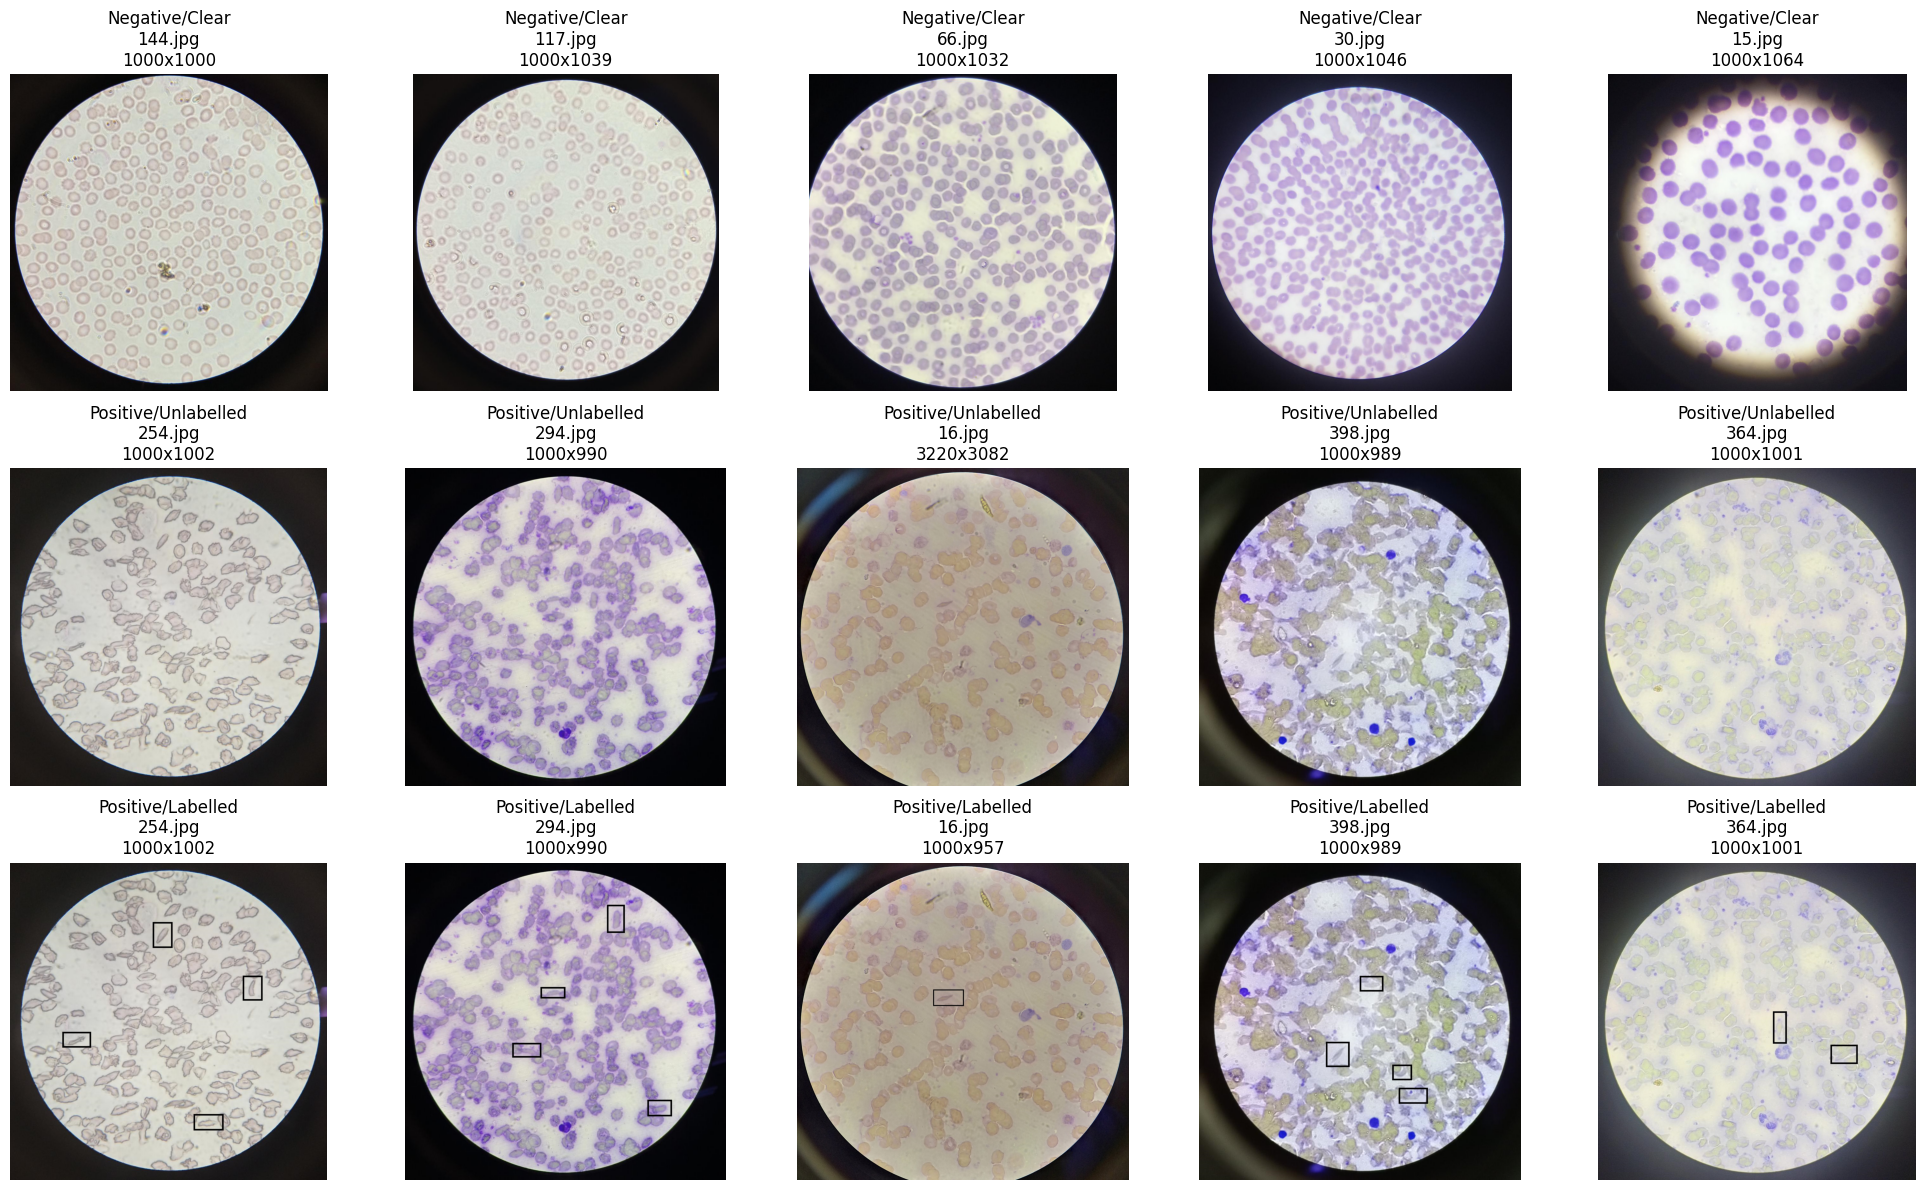


Duplicate filenames across folders (potential duplicates): ['45.jpg', '56.jpg', '89.jpg', '20.jpg', '58.jpg', '6.jpg', '109.jpg', '76.jpg', '71.jpg', '143.jpg', '115.jpg', '131.jpg', '5.jpg', '8.jpg', '84.jpg', '85.jpg', '67.jpg', '118.jpg', '82.jpg', '30.jpg', '97.jpg', '106.jpg', '113.jpg', '38.jpg', '42.jpg', '33.jpg', '10.jpg', '54.jpg', '130.jpg', '62.jpg', '120.jpg', '35.jpg', '61.jpg', '124.jpg', '59.jpg', '73.jpg', '98.jpg', '41.jpg', '123.jpg', '94.jpg', '60.jpg', '57.jpg', '112.jpg', '91.jpg', '9.jpg', '101.jpg', '99.jpg', '37.jpg', '1.jpg', '69.jpg', '75.jpg', '117.jpg', '81.jpg', '46.jpg', '137.jpg', '44.jpg', '65.jpg', '50.jpg', '127.jpg', '29.jpg', '140.jpg', '79.jpg', '105.jpg', '16.jpg', '111.jpg', '55.jpg', '145.jpg', '135.jpg', '23.jpg', '7.jpg', '77.jpg', '80.jpg', '121.jpg', '28.jpg', '22.jpg', '103.jpg', '40.jpg', '126.jpg', '142.jpg', '48.jpg', '104.jpg', '24.jpg', '88.jpg', '64.jpg', '31.jpg', '114.jpg', '43.jpg', '138.jpg', '100.jpg', '13.jpg', '74.jpg', '68.jp

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import random

# Base dataset path
base_path = '/kaggle/input/sickle-cell-disease-dataset'

# Define folders of interest
folders = [
    'Negative/Clear',
    'Positive/Unlabelled',
    'Positive/Labelled'
]

# Step 1: Collect image file info from all folders
image_info = []

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    files = os.listdir(folder_path)
    print(f"Folder: {folder}, Number of files: {len(files)}")
    
    for f in files:
        file_path = os.path.join(folder_path, f)
        # Read image to get dimensions and channels
        img = cv2.imread(file_path)
        if img is not None:
            height, width, channels = img.shape
            image_info.append({
                'folder': folder,
                'filename': f,
                'width': width,
                'height': height,
                'channels': channels,
                'filesize_kb': os.path.getsize(file_path) / 1024
            })
        else:
            print(f"Warning: Unable to read image {file_path}")

# Step 2: Create DataFrame from collected info
df_images = pd.DataFrame(image_info)
print("\nSummary of dataset images:")
print(df_images.groupby('folder').size())

print("\nImage dimension stats per folder:")
print(df_images.groupby('folder')[['width', 'height']].agg(['mean', 'min', 'max']))

# Step 3: Visualize distribution of image widths and heights
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='folder', y='width', data=df_images)
plt.title('Distribution of Image Widths')

plt.subplot(1, 2, 2)
sns.boxplot(x='folder', y='height', data=df_images)
plt.title('Distribution of Image Heights')

plt.tight_layout()
plt.show()

# Step 4: Display 5 random sample images per folder
def plot_samples(df, n=5):
    plt.figure(figsize=(20, 4 * len(folders)))
    for i, folder in enumerate(folders):
        samples = df[df['folder'] == folder].sample(n=n, random_state=42)
        for j, (_, row) in enumerate(samples.iterrows()):
            img_path = os.path.join(base_path, folder, row['filename'])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(len(folders), n, i * n + j + 1)
            plt.imshow(img)
            plt.title(f"{folder}\n{row['filename']}\n{row['width']}x{row['height']}")
            plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_samples(df_images)

# Step 5: Check for duplicate filenames across folders
all_filenames = df_images['filename'].tolist()
duplicates = [item for item, count in Counter(all_filenames).items() if count > 1]

print(f"\nDuplicate filenames across folders (potential duplicates): {duplicates if duplicates else 'None'}")


## Challenges I Expect and How I Plan to Handle Them
Looking at the dataset, I can already see a few challenges I’ll probably face when training my model. Here’s what I’m thinking and how I plan to tackle these issues:

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

# Dummy dataset
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create dummy data
data = torch.randn(100, 3, 224, 224)
labels = torch.cat([torch.zeros(90, dtype=torch.long), torch.ones(10, dtype=torch.long)])

# Create dataset
dataset = MyDataset(data, labels)

# Calculate weights
class_counts = torch.bincount(labels)
class_weights = 1. / class_counts.float()
sample_weights = class_weights[labels]

sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)
loader = DataLoader(dataset, batch_size=16, sampler=sampler)

### Problem: The dataset has many more Positive images than Negative, which can bias the model towards the majority class.

### Mitigation: Use a WeightedRandomSampler during training to balance classes by sampling minority class images more frequently.

## Challenge 2: 
Small Dataset Size (Limited number of images)

### Problem: The dataset size is small, risking overfitting and poor generalization.

### Mitigation: Use Data Augmentation to artificially increase diversity by applying random flips, rotations, brightness shifts, etc., without resizing.

In [ ]:
from torchvision import transforms

# Data augmentation pipeline (no resizing)
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor()
])


## Step 1: Setup Dataset and Model with TorchVision


In [44]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Dataset directory
data_dir = "/kaggle/input/sickle-cell-disease-dataset"

# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset from folders: expects /Positive and /Negative folders
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Train-validation split
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Load ResNet18 without pretrained weights (offline-compatible)
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 2)  # Binary classification
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Using device: cpu


## Step 2: Train Model and Collect Metrics


In [45]:
# Initialize lists to collect loss history
train_loss_history = []
val_loss_history = []

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)

    # Validation
    model.eval()
    total_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
    avg_val_loss = total_val_loss / len(val_loader)
    val_loss_history.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


Epoch 1/5 - Train Loss: 0.6035, Val Loss: 1.9946
Epoch 2/5 - Train Loss: 0.4120, Val Loss: 0.4164
Epoch 3/5 - Train Loss: 0.3503, Val Loss: 0.2758
Epoch 4/5 - Train Loss: 0.3502, Val Loss: 3.5714
Epoch 5/5 - Train Loss: 0.3355, Val Loss: 0.5479


## Step 3: Visualize Training Performance with Seaborn

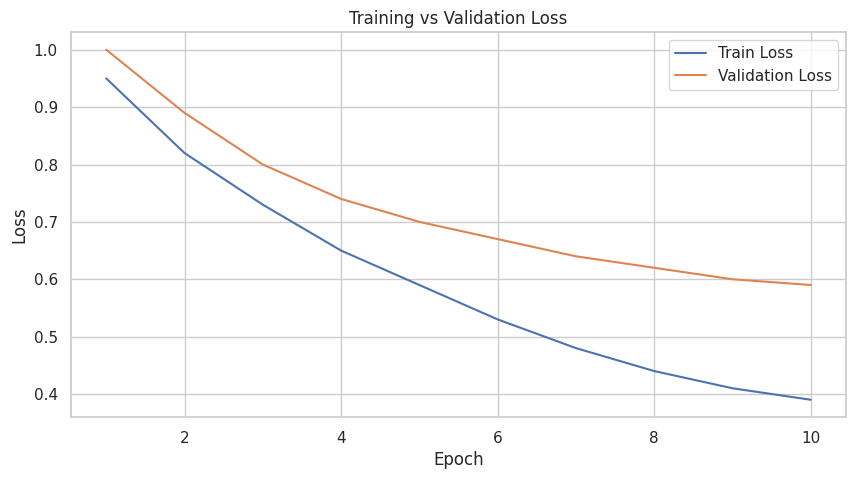

In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Seaborn plot code
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, num_epochs + 1), y=train_loss_history, label='Train Loss')
sns.lineplot(x=range(1, num_epochs + 1), y=val_loss_history, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


# AI Diagnostic Assistant for Rare Inherited Diseases

## Project Overview
In this project, I am developing a machine learning-powered diagnostic assistant to help identify rare inherited diseases, particularly those that are often underdiagnosed in the Caribbean, Latin America, and among diaspora populations in the United States. The tool is designed to analyze structured symptom data and basic lab test results to assist general practitioners and frontline healthcare workers in identifying potential cases that require referral to specialists.

## Target Diseases
The diseases I selected are rare inherited blood and metabolic disorders that are clinically significant, frequently missed, and relevant to both regional and diaspora populations. These include:

- **Sickle Cell Disease (SCD)**  
  Common in Afro-Caribbean populations such as those in Jamaica, Haiti, and the Dominican Republic, as well as among U.S. diaspora communities in Florida, New York, and Georgia. It also benefits from robust U.S.-based datasets for modeling.

- **Beta-Thalassemia**  
  Prevalent among populations with African, Indian, and Chinese ancestry, including in Trinidad & Tobago, Guyana, and Suriname, along with their diaspora communities in South Florida and New York.

- **Gaucher Disease Type 1**  
  Although rare, this disease is documented in countries like Brazil, Colombia, and Argentina, and is also found among Latino populations in U.S. cities with large Central and South American communities.

- **Maple Syrup Urine Disease (MSUD)**  
  Increasingly diagnosed through newborn screening programs in Brazil, Mexico, and the United States, yet often missed in rural areas and underserved immigrant communities.

## Intended Users
The tool is intended for:

- General practitioners, pediatricians, and other primary care providers in resource-limited settings
- Healthcare professionals in Latin America, the Caribbean, and U.S. immigrant-rich regions who face diagnostic challenges due to limited specialist access

By providing early decision support based on symptoms and routine test results, the assistant can help reduce delays in diagnosis and improve patient outcomes through earlier intervention.

## Data Sources and Inputs
The diagnostic assistant uses structured tabular data typically available in primary care settings. These include:

**Symptoms:**
- Chronic fatigue
- Growth delays
- Bone or joint pain
- Recurrent infections
- Jaundice
- Abdominal swelling (e.g., hepatosplenomegaly)

**Basic Laboratory Results:**
- Hemoglobin, Hematocrit, MCV (for anemia)
- Reticulocyte count
- Total and direct bilirubin (for hemolysis/liver function)
- Creatine kinase (muscle breakdown)
- ALT and AST (liver enzymes)

**Demographic and Risk Factors:**
- Age and sex
- Ethnicity (Afro-Caribbean, Latino, Indigenous, South Asian-Caribbean)
- Family history of inherited diseases
- Country or region of residence

**Data Sources:**
- U.S. public datasets (e.g., CDC Sickle Cell Data Collection, NHANES, SEER)
- Regional health records from Latin America and the Caribbean (e.g., Brazil's DATASUS, PAHO surveillance data)
- Synthetic datasets to compensate for missing or inaccessible real-world data

## Modeling Approach
For this project, I plan to use a combination of interpretable and high-performing machine learning models, including:

- Random Forests
- XGBoost (Extreme Gradient Boosting)
- Logistic Regression (for clinical explainability)

Each model will be evaluated for accuracy, interpretability, and fairness, ensuring that the tool can generalize across diverse ethnic and regional populations.

## Expected Impact
This project aims to:

- Reduce diagnostic delays for rare inherited diseases
- Improve early detection in underserved and marginalized communities
- Support primary care providers with decision-making tools
- Contribute to health equity by addressing diagnostic gaps in low-resource settings


## Deployment Using Streamlit

In [ ]:
!pip install streamlit

In [ ]:
# app.py
import streamlit as st
import torch
import torch.nn.functional as F
from torchvision import transforms, models
from PIL import Image

# Load your model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(weights=None)
model.fc = torch.nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load("model.pth", map_location=device))
model.to(device)
model.eval()

# Transform for uploaded images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Streamlit UI
st.title("AI Diagnostic Assistant for Inherited Diseases")

uploaded_file = st.file_uploader("Upload Blood Smear Image", type=["jpg", "png", "jpeg"])
if uploaded_file:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    img_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(img_tensor)
        prediction = torch.argmax(F.softmax(output, dim=1), dim=1).item()

    label_map = {0: "Negative", 1: "Positive"}
    st.subheader(f"Model Prediction: {label_map[prediction]}")


In [ ]:
#http://localhost:8501/
streamlit run app.py


## Adding BioGPT for Chat Feature

To enhance the usability and accessibility of the diagnostic assistant, I plan to integrate **BioGPT**, a domain-specific language model trained on biomedical literature. This feature will allow users—especially clinicians and medical staff—to interact with the system through natural language.

**Purpose of the Chat Feature:**
- Enable users to ask follow-up questions (e.g., "What conditions could cause jaundice and joint pain in a child?")
- Clarify the reasoning behind the diagnostic suggestions
- Provide explanations of clinical terms, symptoms, and recommended next steps
- Serve as an educational assistant for non-specialist healthcare workers

**Why BioGPT?**
BioGPT is designed to generate medically relevant and accurate responses based on biomedical knowledge. It is particularly suited for tasks like:
- Clinical question answering
- Literature-based summarization
- Interpreting symptoms and lab values in a medical context

By embedding BioGPT into the assistant, I aim to make the system more interactive, informative, and user-friendly—especially in low-resource environments where access to specialists is limited.


In [ ]:
!pip install transformers

In [ ]:
from transformers import BioGptTokenizer, BioGptForCausalLM

@st.cache_resource
def load_biogpt():
    tokenizer = BioGptTokenizer.from_pretrained("microsoft/biogpt")
    model = BioGptForCausalLM.from_pretrained("microsoft/biogpt")
    return tokenizer, model

tokenizer, biogpt = load_biogpt()

st.subheader("Ask BioGPT a Medical Question")
user_input = st.text_input("Type your question below:")

if user_input:
    inputs = tokenizer(user_input, return_tensors="pt")
    outputs = biogpt.generate(**inputs, max_length=100)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    st.write("BioGPT says:")
    st.write(response)


## Full Deployment Code (app.py)

In [ ]:
import streamlit as st
import torch
import torch.nn.functional as F
from torchvision import transforms, models
from PIL import Image
from transformers import BioGptTokenizer, BioGptForCausalLM

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the diagnostic model
@st.cache_resource
def load_classifier_model():
    model = models.resnet18(weights=None)
    model.fc = torch.nn.Linear(model.fc.in_features, 2)
    model.load_state_dict(torch.load("model.pth", map_location=device))
    model.to(device)
    model.eval()
    return model

model = load_classifier_model()

# Image transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Title
st.title("🧬 AI Diagnostic Assistant")
st.markdown("Upload a blood smear image to get a diagnostic prediction and ask medical questions via BioGPT.")

# Upload image for diagnosis
uploaded_file = st.file_uploader("Upload Blood Smear Image", type=["jpg", "jpeg", "png"])

if uploaded_file:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess and predict
    img_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(img_tensor)
        prediction = torch.argmax(F.softmax(output, dim=1), dim=1).item()

    # Map result
    label_map = {0: "Negative (No Disease)", 1: "Positive (Potential Sickle Cell Disease)"}
    st.subheader(f"🩺 Diagnosis: **{label_map[prediction]}**")

# ----------------------------------------
# BioGPT Chat Feature
# ----------------------------------------

st.markdown("---")
st.subheader("💬 Ask BioGPT a Medical Question")

# Load BioGPT model
@st.cache_resource
def load_biogpt():
    tokenizer = BioGptTokenizer.from_pretrained("microsoft/biogpt")
    model = BioGptForCausalLM.from_pretrained("microsoft/biogpt")
    return tokenizer, model

tokenizer, biogpt_model = load_biogpt()

# Chat interface
chat_input = st.text_input("Enter your medical question here:")

if chat_input:
    inputs = tokenizer(chat_input, return_tensors="pt")
    outputs = biogpt_model.generate(**inputs, max_length=100, do_sample=True, top_k=50, top_p=0.95)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    st.markdown("**BioGPT's Response:**")
    st.write(response)


In [ ]:
#Additional Instructions 1. Save trained PyTorch model as model.pth:
torch.save(model.state_dict(), "model.pth")

In [ ]:
# Install Required Packages:
!pip install streamlit torch torchvision transformers

In [ ]:
#Run App:
streamlit run app.py